## import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import warnings  
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("nba.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


## data analysis and data preprocessing

In [3]:
df = df.drop(labels=457,axis=0) #deleted last row

In [4]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [5]:
df["College"].fillna("No College",inplace=True)

In [6]:
df["Salary"].fillna(df["Salary"].mean(),inplace=True)

In [7]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [8]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [9]:
df["Height"] = df["Height"].replace("-",".",regex=True)
df["Height"] = df["Height"].astype("float")

In [10]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height      float64
Weight      float64
College      object
Salary      float64
dtype: object

## Provide summary statistics (mean, median, minimum, maximum, standard deviation) for a dataset (age, income etc.) with numeric variables grouped by one of the qualitative (categorical) variable. For example, if your categorical variable is age groups and quantitative variable is income, then provide summary statistics of income grouped by the age groups. Create a list that contains a numeric value for each response to the categorical variable.


In [11]:
def desc_func(col,col_data):
    print("For column",col,":")
    print("minimum",col," :",col_data.min())
    print("maximum",col," :",col_data.max())
    print("mean",col," :",col_data.mean())
    print("median",col," :",col_data.median())
    print("std",col," :",col_data.std())
    print("25%",col," :",col_data.quantile(0.25))
    print("75%",col," :",col_data.quantile(0.75))
    print("\n\n")

In [12]:
temp_df = ["Number","Age", "Height", "Weight", "Salary"]
for col in temp_df:
    desc_func(col,df[col])

For column Number :
minimum Number  : 0.0
maximum Number  : 99.0
mean Number  : 17.678336980306344
median Number  : 13.0
std Number  : 15.966090405679639
25% Number  : 5.0
75% Number  : 25.0



For column Age :
minimum Age  : 19.0
maximum Age  : 40.0
mean Age  : 26.938730853391686
median Age  : 26.0
std Age  : 4.4040164244058335
25% Age  : 24.0
75% Age  : 30.0



For column Height :
minimum Height  : 5.11
maximum Height  : 7.3
mean Height  : 6.517133479212253
median Height  : 6.6
std Height  : 0.3522052857135719
25% Height  : 6.11
75% Height  : 6.8



For column Weight :
minimum Weight  : 161.0
maximum Weight  : 307.0
mean Weight  : 221.52297592997812
median Weight  : 220.0
std Weight  : 26.36834262669547
25% Weight  : 200.0
75% Weight  : 240.0



For column Salary :
minimum Salary  : 30888.0
maximum Salary  : 25000000.0
mean Salary  : 4842684.105381167
median Salary  : 2869440.0
std Salary  : 5165780.627967718
25% Salary  : 1100602.0
75% Salary  : 6331404.0





In [13]:
df.describe().round()

,Number,Age,Height,Weight,Salary
count,457.0,457.0,457.0,457.0,457.0
mean,18.0,27.0,7.0,222.0,4842684.0
std,16.0,4.0,0.0,26.0,5165781.0
min,0.0,19.0,5.0,161.0,30888.0
25%,5.0,24.0,6.0,200.0,1100602.0
50%,13.0,26.0,7.0,220.0,2869440.0
75%,25.0,30.0,7.0,240.0,6331404.0
max,99.0,40.0,7.0,307.0,25000000.0


## Categorical variable as "Age" , Quantitative variable as "Salary" , group by "Age" we have to summarize that "Salary"

In [14]:
# making the groups according to "Age"
#creating new column list : Age_group[]
Age_group = []

for age in df["Age"]:
    if (age>=18) and (age<25):
        Age_group.append("Young")
    elif (age>=25) and (age<35):
        Age_group.append("Middle Age")
    else:
        Age_group.append("Old")
        
# print(Age_group)

In [15]:
# adding the newly created Age_group column in df
df["Age_group"] = Age_group

In [16]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_group
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7.730337e+06,Middle Age
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6.796117e+06,Middle Age
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,4.842684e+06,Middle Age
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1.148640e+06,Young
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.1,231.0,No College,5.000000e+06,Middle Age
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6.1,234.0,Kentucky,2.239800e+06,Young
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6.3,203.0,Butler,2.433333e+06,Middle Age
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6.1,179.0,No College,9.000000e+05,Young
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7.3,256.0,No College,2.900000e+06,Middle Age


## now group by Age_group and find the mean(), mode(), median() statistic

In [17]:
Age_group_categorical_data = df.groupby("Age_group") # groupby(categorical variable)

In [18]:
print("Mean of Age_group:")
Age_group_categorical_data.mean()

Mean of Age_group:


,Number,Age,Height,Weight,Salary
Age_group,,,,,
Middle Age,17.531365,28.332103,6.488487,222.793358,6.137689e+06
Old,21.125000,36.656250,6.566250,225.312500,3.890327e+06
Young,17.220779,22.467532,6.557338,218.500000,2.761705e+06


In [19]:
print("Median of Age_group:")
Age_group_categorical_data.median()

Median of Age_group:


,Number,Age,Height,Weight,Salary
Age_group,,,,,
Middle Age,12.0,28.0,6.50,225.0,4300000.0
Old,21.5,36.0,6.65,229.0,2877470.0
Young,13.0,23.0,6.60,216.5,1721379.5


In [20]:
Age_group_categorical_data.std()

,Number,Age,Height,Weight,Salary
Age_group,,,,,
Middle Age,16.656606,2.602072,0.368294,27.379935,5.728104e+06
Old,11.746654,1.618629,0.304469,23.349294,4.495571e+06
Young,15.474308,1.419605,0.328604,24.975609,3.164929e+06


In [21]:
Age_group_categorical_data.min()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
Age_group,,,,,,,,,
Middle Age,Aaron Brooks,Atlanta Hawks,0.0,C,25.0,5.11,161.0,Alabama,55722.0
Old,Andre Miller,Atlanta Hawks,1.0,C,35.0,6.10,172.0,Arizona,222888.0
Young,Aaron Gordon,Atlanta Hawks,0.0,C,19.0,5.11,165.0,Arizona,30888.0


In [22]:
Age_group_categorical_data.max()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
Age_group,,,,,,,,,
Middle Age,Zaza Pachulia,Washington Wizards,99.0,SG,34.0,7.3,307.0,Wisconsin,22970500.0
Old,Vince Carter,Toronto Raptors,42.0,SG,40.0,7.0,260.0,Xavier,25000000.0
Young,Zach LaVine,Washington Wizards,92.0,SG,24.0,7.3,280.0,Wyoming,16407501.0


## provide summary statistics of income / salary grouped by the age groups

In [25]:
Age_group_categorical_data["Salary"].min()

Age_group
Middle Age     55722.0
Old           222888.0
Young          30888.0
Name: Salary, dtype: float64

<Axes: xlabel='Age_group'>

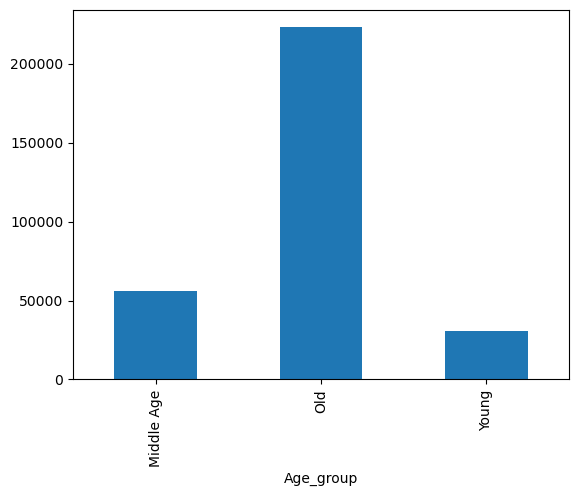

In [31]:
Age_group_categorical_data["Salary"].min().plot.bar()

In [26]:
Age_group_categorical_data["Salary"].max()

Age_group
Middle Age    22970500.0
Old           25000000.0
Young         16407501.0
Name: Salary, dtype: float64

<Axes: xlabel='Age_group'>

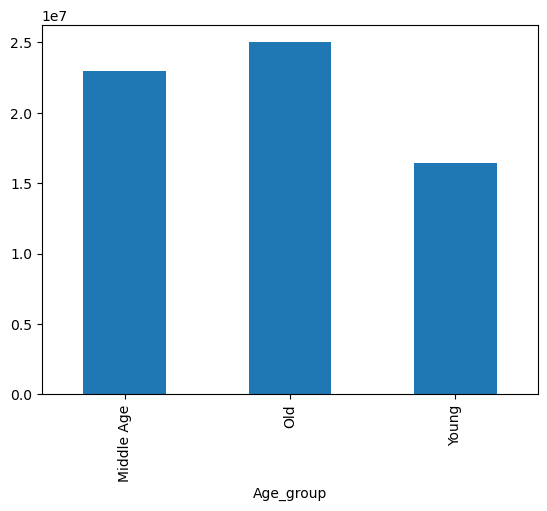

In [35]:
Age_group_categorical_data["Salary"].max().plot.bar()

In [27]:
Age_group_categorical_data["Salary"].median()

Age_group
Middle Age    4300000.0
Old           2877470.0
Young         1721379.5
Name: Salary, dtype: float64

<Axes: xlabel='Age_group'>

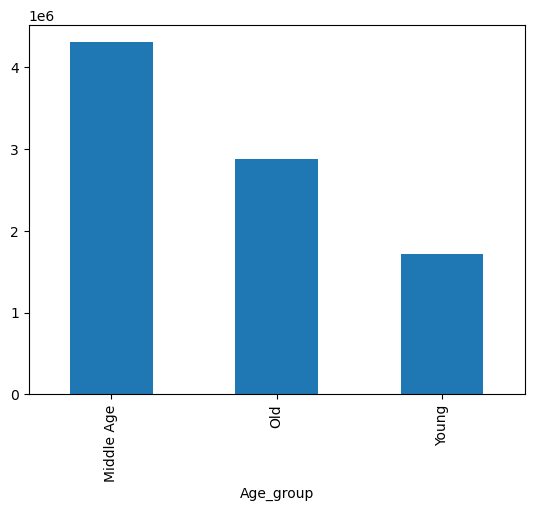

In [36]:
Age_group_categorical_data["Salary"].median().plot.bar()

In [ ]:
def basic_statistics(df):
    print("\nIris-setosa")
    print(df[df.Species=='Iris-setosa'].describe().transpose())
    print("\nIris-versicolor")
    print(df[df.Species=='Iris-versicolor'].describe().transpose())
    print("\nIris-virginica")
    print(df[df.Species=='Iris-virginica'].describe().transpose())
basic_statistics(df) 